# Normal shock waves

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

# Pint gives us some helpful unit conversion
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity # We will use this to construct quantities (value + unit)

In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

**Shock waves** are finite pressure disturbances that correspond to a large change in properties over a short distance, on the order of a few free molecular paths of the gas.
In contrast, sound waves are infinitesimal disturbances.

We can analyze the flow through a shock wave with a control volume, applying our existing conservation equations.

:::{figure-md} fig-shock
<img src="../images/shock.*" alt="Control volume around shock" class="bg-primary mb-1" width="400px">

Control volume around a shock.
:::

{numref}`Figure {number} <fig-shock>` shows a control volume around a shock wave, in a duct with varying area. The thickness of the control volume is very small, on the order of the thickness of the shock itself (so $dx \sim 10^{-6}$ m).
We will make the following assumptions about the flow:
- steady, one-dimensional flow
- adiabatic flow process: $\delta q = 0$, and so $ds_e = 0$
- no shaft work across the control volume: $\delta w_s = 0$
- no potential change: $dz = 0$
- constant area around the shock: $A_1 = A_2$

We can apply conservation of mass to this control volume:

$$
\rho_1 A_1 V_1 = \rho_2 A_2 V_2
$$

$$
\rho_1 V_1 = \rho_2 V_2 \;,
$$ (eq_mass)

conservation of energy:

\begin{gather*}
h_{t1} + q = h_{t2} + w_s \\
h_{t1} = h_{t2}
\end{gather*}

$$
h_1 + \frac{V_1^2}{2} = h_2 + \frac{V_2^2}{2} \;,
$$ (eq_energy)

and momentum:

\begin{gather*}
\sum{F_x} = \dot{m} \left( V_{\text{out},x} - V_{\text{in}, x} \right) = \dot{m} \left( V_{2x} - V_{1x} \right) \\
p_1 A_1 - p_2 A_2 = ( p_1 - p_2 ) A = \dot{m} (V_2 - V_1) = \rho A V (V_2 - V_1) \\
p_1 - p_2 = (\rho V) V_2 - (\rho V) V_1 \\
p_1 - p_2 = \rho_2 V_2^2 - \rho_1 V_1^2
\end{gather*}

$$
p_1 + \rho_1 V_1^2 = p_2 + \rho_2 V_2^2 \;.
$$ (eq_momentum)

For an arbitrary fluid, we have three equations: {eq}`eq_mass`, {eq}`eq_energy`, and {eq}`eq_momentum`.
In a typical problem, we know the fluid and conditions before the shock, and want to find the conditions after the shock.
Thus, our known variables are $\rho_1$, $p_1$, $h_1$, and $V_1$, while our unknown variables are $\rho_2$, $p_2$, $h_2$, and $V_2$.
We need a fourth equation to close this system of equation: a property relation for the fluid, otherwise known as an equation of state.

## Perfect gases

For ideal/perfect gases, we have the ideal gas equation of state, and can assume constant values for $c_p$, $c_v$, and $\gamma$.
We also have a convenient relationship for the speed of sound:

\begin{gather*}
p = \rho R T \\
V = M a = M \sqrt{\gamma R T} \;.
\end{gather*}

Incorporating these into Equation {eq}`eq_mass` we can obtain

$$
\frac{p_1}{M_1}{\sqrt{T_1}} = \frac{p_2 M_2}{\sqrt{T_2}} \;.
$$ (eq_mass2)

With our stagnation relationship for temperature, $ T_t = T \left( 1 + (\gamma-1)M^2 / 2 \right)^2 $, Equation {eq}`eq_energy` becomes

$$
T_1 \left( 1 + \frac{\gamma-1}{2} M_1^2 \right) = T_2 \left( 1 + \frac{\gamma-1}{2} M_2^2 \right) \;,
$$ (eq_energy2)

which applies both around a normal shock and also at any point in a general flow with no work or heat transfer.
Lastly, incorporating our relationships for perfect gases into Equation {eq}`eq_momentum` we obtain

$$
p_1 \left( 1 + \gamma M_1^2 \right) = p_2 \left( 1 + \gamma M_2^2 \right) \;.
$$ (eq_momentum2)

Now, we have three equations and three unknowns: $M_2$, $p_2$, and $T_2$. 😎

However, it is a bit of a pain to solve this complicated system of equations every time. 
Fortunately, we can combine all three together and eliminate pressure and temperature completely!

$$
\left( \frac{1 + \gamma M_2^2}{1 + \gamma M_1^2} \right) \frac{M_1}{M_2} = \left( \frac{1 + \frac{\gamma-1}{2} M_2^2}{1 + \frac{\gamma-1}{2} M_1^2} \right)^{1/2} \;,
$$

which can actually be solved to find $M_2 = f(\gamma, M_1)$.
A trivial solution to this equation is that $M_1 = M_2$, where there is no shock.
(What does this mean? Just that the governing equations we set up apply just fine for a flow where there is no shock—good news!)

For nontrivial solutions, with some painful algebra we can rearrange this equation into a recognizable form:

$$
A \left( M_2^2 \right)^2 + B M_2^2 + C = 0 \;,
$$

where $A, B, C = f(\gamma, M_1)$. This looks like a quadratic equation! The only physically viable solution to this equation is

$$
M_2^2 = \frac{M_1^2 + \frac{2}{\gamma-1}}{\frac{2 \gamma}{\gamma-1} M_1^2 - 1} \;.
$$ (eq_normal_shock)

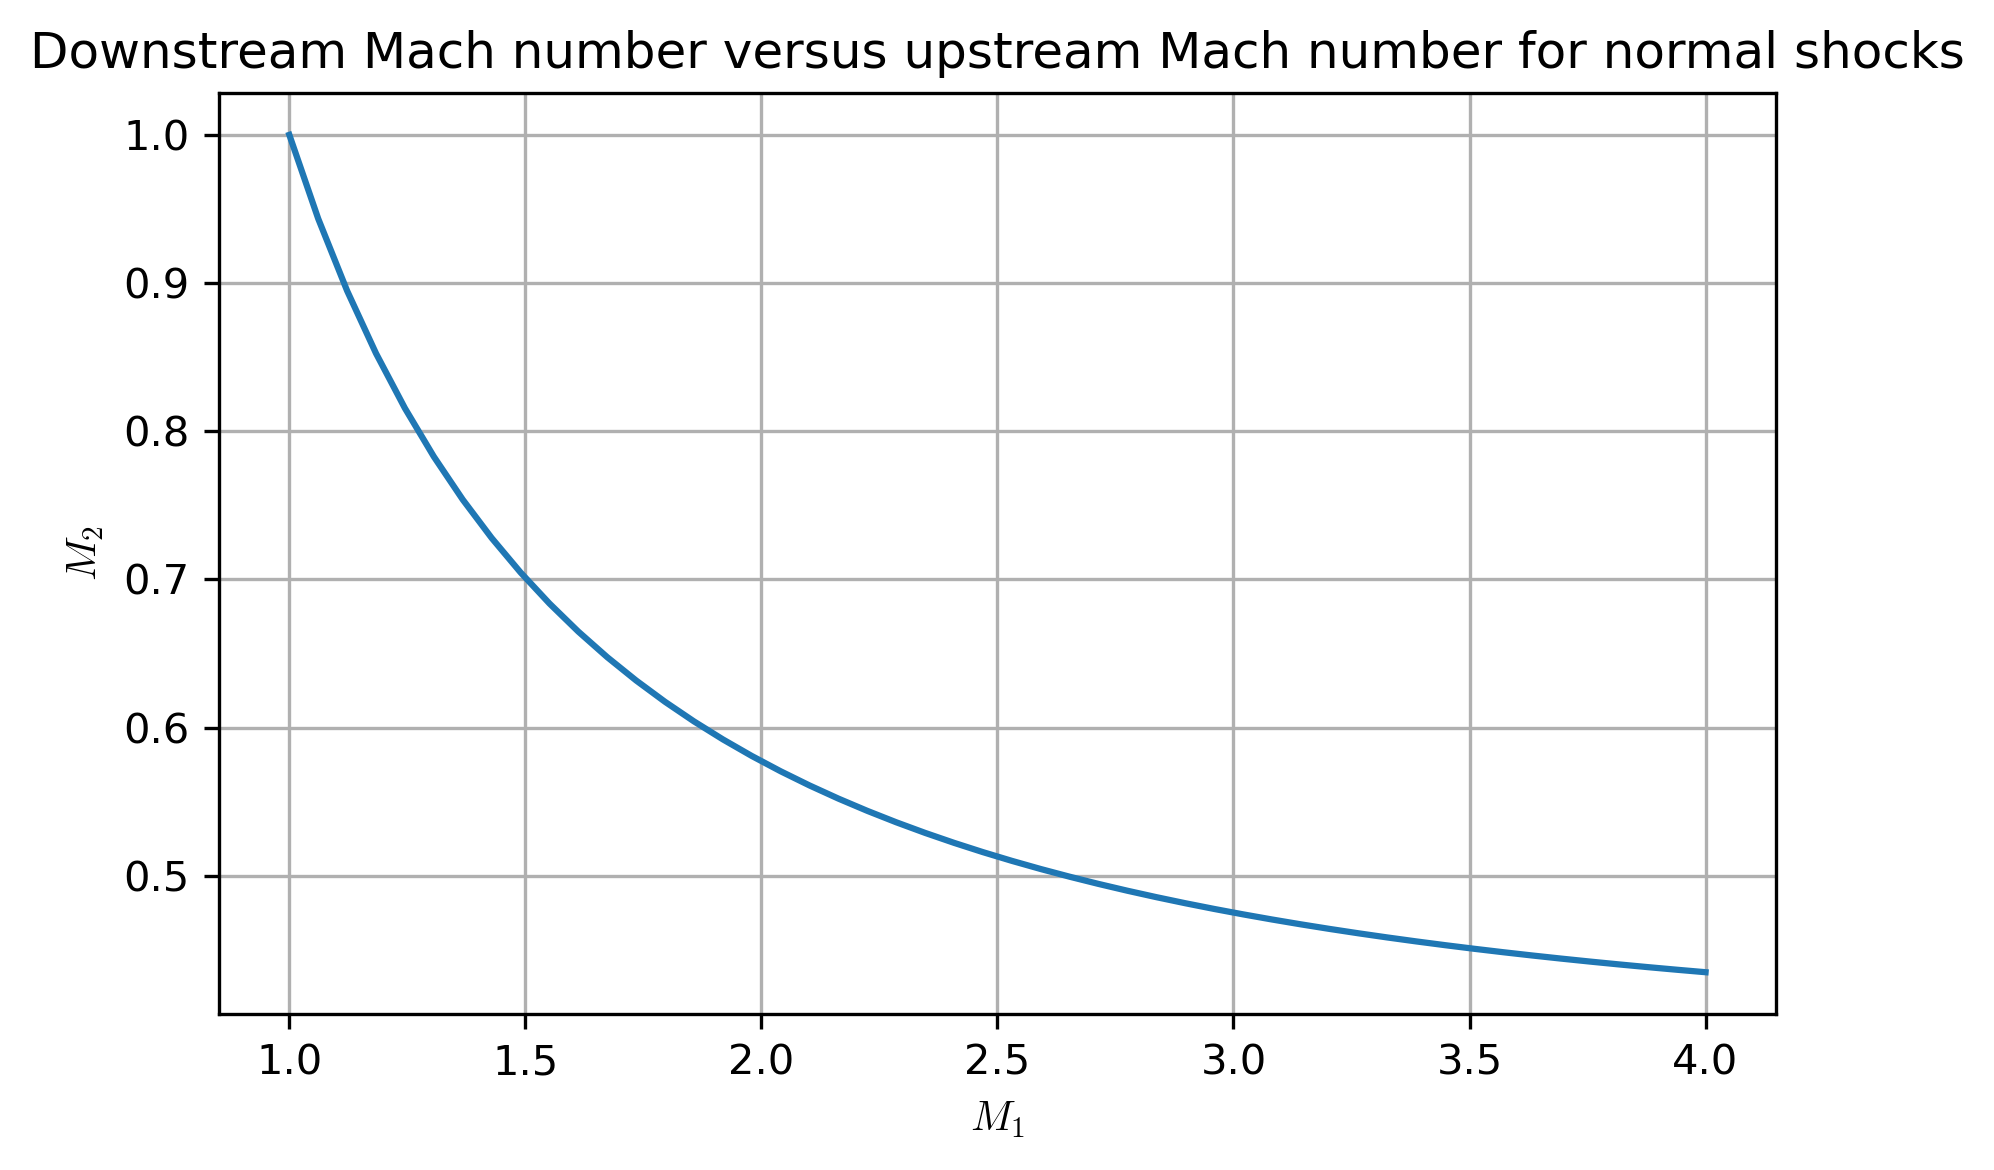

In [3]:
gamma = 1.4
mach1 = np.linspace(1.0, 4.0, num=50, endpoint=True)
mach2 = np.sqrt((mach1**2 + 2/(gamma-1))/(2*gamma*mach1**2/(gamma-1) - 1))

plt.plot(mach1, mach2)
plt.xlabel(r'$M_1$')
plt.ylabel(r'$M_2$')
plt.title('Downstream Mach number versus upstream Mach number for normal shocks')
plt.grid(True)
plt.tight_layout()
plt.show()

A typical problem flow is that we have $\gamma$ and $M_1$, use these to determine $M_2$, and then use Equations {eq}`eq_energy2` and {eq}`eq_momentum2` to obtain $T_2$ and $p_2$. More convenient versions of these equations are

$$
\frac{T_2}{T_1} = \frac{1 + \frac{\gamma-1}{2} M_1^2}{1 + \frac{\gamma-1}{2} M_2^2}
$$ (eq_normal_temperature)

$$
\frac{p_2}{p_1} = \frac{1 + \gamma M_1^2}{1 + \gamma M_2^2} = \frac{2 \gamma M_1^2 - \gamma + 1}{\gamma + 1}
$$ (eq_normal_pressure)

$$
\frac{\rho_2}{\rho_1} = \frac{(\gamma+1) M_1^2}{(\gamma-1) M_1^2 + 2}
$$ (eq_normal_density)

```{note}
Since $M_1 > 1$, $M_2 < 1$ **always** for a normal shock.
```